In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns+
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('diabetes.csv')

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.shape

(768, 9)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [46]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Outcome', ylabel='Count'>

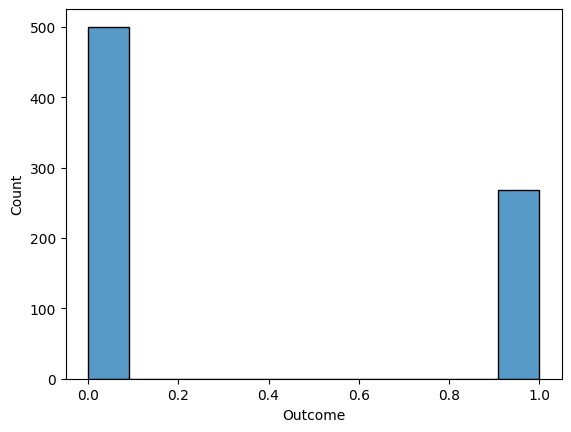

In [47]:
sns.histplot(df['Outcome'])

In [48]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: >

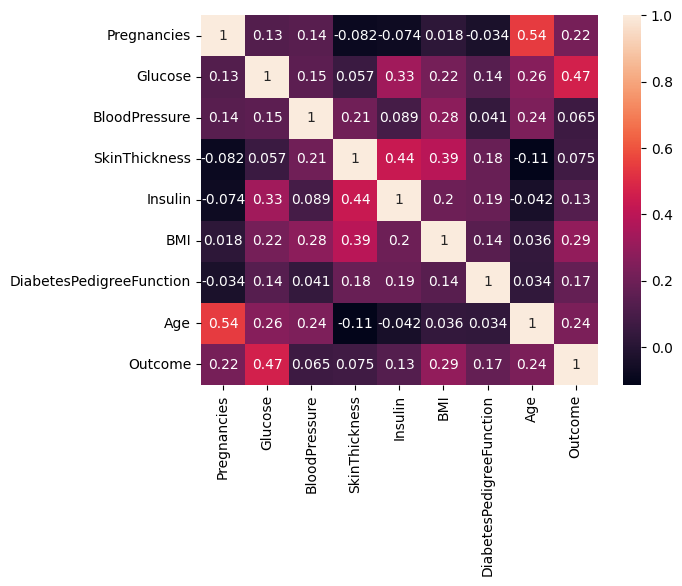

In [49]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [50]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [51]:
X = df.drop('Outcome',axis=1)
y=df['Outcome']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [53]:
scaler = StandardScaler()

In [54]:
X_scaled = scaler.fit_transform(X)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,stratify=y ,random_state=42)

In [56]:
svc_model = SVC(kernel='linear')

In [57]:
svc_model.fit(X_train,y_train)

SVC(kernel='linear')

In [58]:
y_pred = svc_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,y_pred)

0.7207792207792207

In [61]:
y_pred = svc_model.predict(X_train)

In [62]:
accuracy_score(y_train,y_pred)

0.7915309446254072

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Glucose', ylabel='Count'>

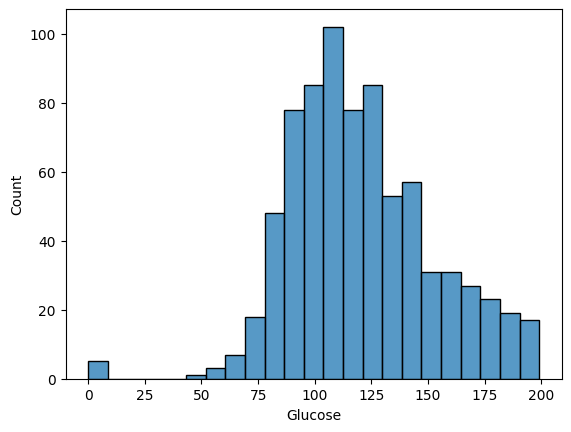

In [67]:
sns.histplot(df['Glucose'])

In [71]:
glucose_mean = df.loc[df['Glucose'] != 0 ,'Glucose' ].mean()
df['Glucose'] = df['Glucose'].replace(0,glucose_mean)

<Axes: xlabel='Glucose', ylabel='Count'>

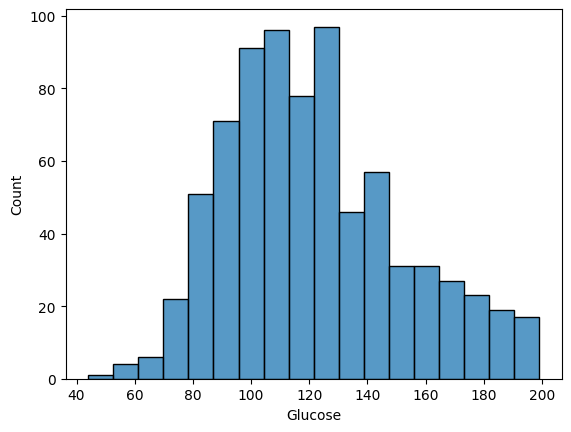

In [72]:
sns.histplot(df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

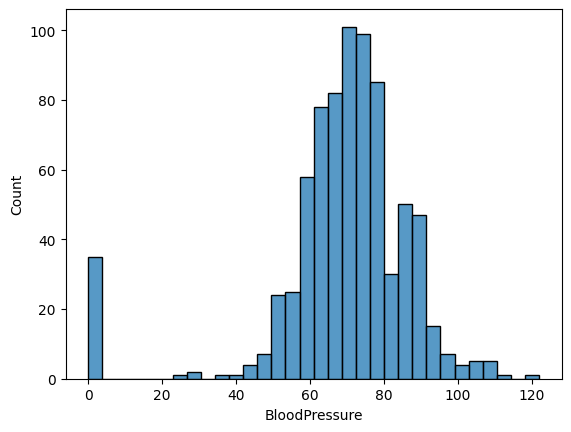

In [73]:
sns.histplot(df['BloodPressure'])

In [74]:
glucose_mean = df.loc[df['BloodPressure'] != 0 ,'BloodPressure' ].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0,glucose_mean)

<Axes: xlabel='BloodPressure', ylabel='Count'>

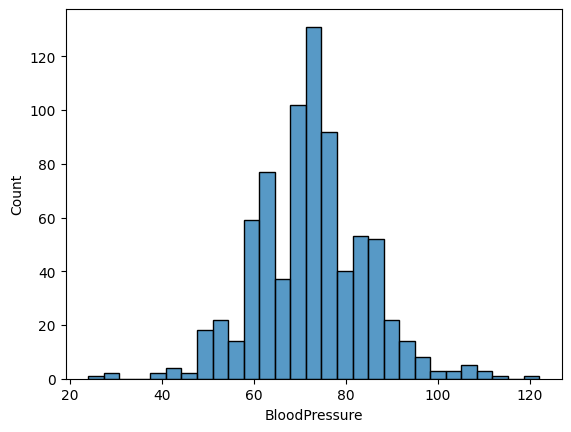

In [75]:
sns.histplot(df['BloodPressure'])

In [76]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.median(), inplace=True)


In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [88]:
df_final = df.copy()

In [89]:
X_final = df_final.drop('Outcome',axis=1)
Y_final = df_final['Outcome']

In [90]:
X_scaled = scaler.fit_transform(X_final)

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_final,test_size=0.2,stratify=Y_final ,random_state=42)

In [96]:
svc_model = SVC()

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')

In [98]:
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV Accuracy: 0.7801812608290017


In [153]:
svc_model3 = SVC(kernel='rbf')

In [154]:
svc_model3.fit(X_train,y_train)

SVC()

In [155]:
y_pred_3 = svc_model3.predict(X_test)

In [156]:
accuracy_score(y_test,y_pred_3)

0.7337662337662337

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))


              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [158]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_model3, X_scaled, y, cv=10, scoring='accuracy')
print("CV Mean Accuracy:", scores.mean())


CV Mean Accuracy: 0.7539131920710869


In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, "Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.7077922077922078
Random Forest Accuracy: 0.7467532467532467
KNN Accuracy: 0.7532467532467533


In [160]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



in this dataset the model accurary is ceiled to 75 - 78 % we need better data set for practice
